### Pre-processing:
* Data reformatting, cleaning
* Remove malformed, bad records
* Spurious null fields

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [83]:
# These two lines are needed else it will not display all columns (26 total in my dataframe)
from IPython.display import display
pd.options.display.max_columns = None
# These two lines resize the plot area and font size
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['font.size'] = 12

In [82]:
# Directly doing a pandas read_csv doesn't work because the data is not perfect.  Needs to be cleaned
# before going into a PD dataframe.
n = 0
bad_idx = []
lines = []
with open('./sgos.txt', 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    #reader = pd.read_csv(f, delimiter=' ')
    for row in reader:
        # Needed to suppress an extra blank space placed between fields 9 and 10
        # csReferer and sc-status
        row = filter(lambda x: x != '', row)
        lines.append(row)
        if len(row) != 25:
            bad_idx.append(n)
        n += 1

In [4]:
# Out of ~1 mill records, only 8 bad rows
bad_idx

[69691, 76239, 1041594, 1041595, 1041596, 1041597, 1041598, 1041599]

In [5]:
# Example of good well-formed record
lines[0]

['2011-07-22',
 '20:34:51',
 '282',
 'ce6de14af68ce198',
 '-',
 '-',
 '-',
 'OBSERVED',
 'unavailable',
 'http://www.surfjunky.com/members/sj-a.php?r=44864',
 '200',
 'TCP_NC_MISS',
 'GET',
 'text/html',
 'http',
 'www.surfjunky.com',
 '80',
 '/members/sj-a.php',
 '?r=66556',
 'php',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.65 Safari/534.24',
 '82.137.200.42',
 '1395',
 '663',
 '-']

In [6]:
# Example corrupted row
lines[76239]

['2011-07-22',
 '20:38:25',
 '1554',
 'd521fbde365a0e33',
 '-',
 '-',
 '-',
 'OBSERVED',
 'unavailable',
 'http://chitchat.mybrowserbar.com/cgi/errors.cgi?q=http://chitchat.mybrowserbar.com/cgi/errors.cgi%3fq%3dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%253fq%253dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%25253fq%25253dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%2525253fq%2525253dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%252525253fq%252525253dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%25252525253fq%25252525253dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%2525252525253fq%2525252525253dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%252525252525253fq%252525252525253dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%25252525252525253fq%25252525252525253dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%2525252525252525253fq%2525252525252525253dhttp://chitchat.mybrowserbar.com/cgi/errors.cgi%252525252525252525253fq%252525252525252525253dhttp://chitchat.mybrowserbar.

In [7]:
# Example of SGOS proxy re-starting
lines[1041595:1041599]

[['#Version:', '1.0'],
 ['#Start-Date:', '2011-07-22', '21:25:35'],
 ['#Date:', '2011-06-02', '10:20:47'],
 ['#Fields:',
  'date',
  'time',
  'time-taken',
  'c-ip',
  'cs-username',
  'cs-auth-group',
  'x-exception-id',
  'sc-filter-result',
  'cs-categories',
  'cs(Referer)',
  'sc-status',
  's-action',
  'cs-method',
  'rs(Content-Type)',
  'cs-uri-scheme',
  'cs-host',
  'cs-uri-port',
  'cs-uri-path',
  'cs-uri-query',
  'cs-uri-extension',
  'cs(User-Agent)',
  's-ip',
  'sc-bytes',
  'cs-bytes',
  'x-virus-id']]

In [8]:
np_lines = np.array(lines)
good_lines = np.delete(np_lines, bad_idx)
print 'original  lines:', len(lines)
print 'corrupted lines:', len(bad_idx)
print 'remaining lines:', len(good_lines)

original  lines: 1041833
corrupted lines: 8
remaining lines: 1041825


In [9]:
# Write out the good lines to a new CSV file
with open('./cleaned_sgos.csv', 'wb') as outfile:
    writer = csv.writer(outfile, quoting=csv.QUOTE_ALL)
    writer.writerows(good_lines)

In [10]:
good_lines[0]

['2011-07-22',
 '20:34:51',
 '282',
 'ce6de14af68ce198',
 '-',
 '-',
 '-',
 'OBSERVED',
 'unavailable',
 'http://www.surfjunky.com/members/sj-a.php?r=44864',
 '200',
 'TCP_NC_MISS',
 'GET',
 'text/html',
 'http',
 'www.surfjunky.com',
 '80',
 '/members/sj-a.php',
 '?r=66556',
 'php',
 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/534.24 (KHTML, like Gecko) Chrome/11.0.696.65 Safari/534.24',
 '82.137.200.42',
 '1395',
 '663',
 '-']

#### Data is cleaned up sufficiently to be read into PANDAs DataFrame:

In [11]:
# Read into pandas dataframe
cols = ['dt', 'tm', 'time_taken', 'c_ip', 'cs_username', 'cs_auth_group', 'x_exception_id', 'sc_filter_result', 'cs_categories', 'csReferer', 'sc_status', 's_action', 'cs_method', 'rsContentType', 'cs_uri_scheme', 'cs_host','cs_uri_port', 'cs_uri_path', 'cs_uri_query', 'cs_uri_extension', 'csUserAgent', 's_ip', 'sc_bytes', 'cs_bytes', 'x_virus_id']
sgos = pd.read_csv('./cleaned_sgos.csv', names=cols)

In [12]:
sgos.head(3)

,dt,tm,time_taken,c_ip,cs_username,cs_auth_group,x_exception_id,sc_filter_result,cs_categories,csReferer,sc_status,s_action,cs_method,rsContentType,cs_uri_scheme,cs_host,cs_uri_port,cs_uri_path,cs_uri_query,cs_uri_extension,csUserAgent,s_ip,sc_bytes,cs_bytes,x_virus_id
0,2011-07-22,20:34:51,282,ce6de14af68ce198,-,-,-,OBSERVED,unavailable,http://www.surfjunky.com/members/sj-a.php?r=44864,200,TCP_NC_MISS,GET,text/html,http,www.surfjunky.com,80,/members/sj-a.php,?r=66556,php,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,82.137.200.42,1395,663,-
1,2011-07-22,20:34:51,216,6154d919f8d56690,-,-,-,OBSERVED,unavailable,http://x31.iloveim.com/build_3.9.2.1/comet.html,200,TCP_NC_MISS,GET,text/html;charset=UTF-8,http,x31.iloveim.com,80,/servlets/events,?1122064400327,-,Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US...,82.137.200.42,473,1129,-
2,2011-07-22,20:34:51,307,6d98469a3f1de6f4,-,-,-,OBSERVED,unavailable,http://www.xnxx.com/,200,TCP_MISS,GET,image/jpeg,http,img100.xvideos.com,80,/videos/thumbsl/2/e/5/2e5fd679f1118757314fb9a9...,-,jpg,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,82.137.200.42,16188,415,-


In [13]:
sgos.shape

(1041825, 25)

In [14]:
# Use these two fields to enrich the data frame
urls = sgos[['csReferer', 'cs_host']]

In [15]:
len(urls)

1041825

In [16]:
print urls.loc[1, 'csReferer']
print urls.loc[1, 'cs_host']

http://x31.iloveim.com/build_3.9.2.1/comet.html
x31.iloveim.com


In [ ]:
# Check cs-host values 
# ls.loc[i, 'cs_host'] for i in range(0, len(sgos)) if urls.loc[i, 'cs_host'][0] not in ['-'] ] 

### Data Enrichment:
* Use csReferer and cs-host columns to enrich the data (separate Python Script)
* Enrich data to provide web-categorization for each site via OpenDNS
* Enrich data to use Google's SafeBrowsing API 

These are scripts that must be run outside of Python Notebook!

### Exploratory Data Analysis
Preliminary visualizations to begin answering the following:
* How many requests are censored, how many are allowed?
* What services (ports) are allowed and which are sensored?
* How does censorship change over time?
* What domains are censored?
* What domains are allowed?

In [17]:
# sc_filter_result: OBSERVED, DENIED, PROXIED
sgos.sc_filter_result.value_counts()
print "OBSERVED: %d %.4f" %(sgos.sc_filter_result.value_counts()[0], len(sgos[sgos.sc_filter_result=='OBSERVED']) / float(len(sgos))*100)
print "DENIED:    %d  %.4f" %(sgos.sc_filter_result.value_counts()[1], len(sgos[sgos.sc_filter_result=='DENIED']) / float(len(sgos))*100)
print "PROXIED:    %d  %.4f" %(sgos.sc_filter_result.value_counts()[2], len(sgos[sgos.sc_filter_result=='PROXIED']) / float(len(sgos))*100)

OBSERVED: 980205 94.0854
DENIED:    58004  5.5675
PROXIED:    3616  0.3471


### How many requests are censored, how many allowed?

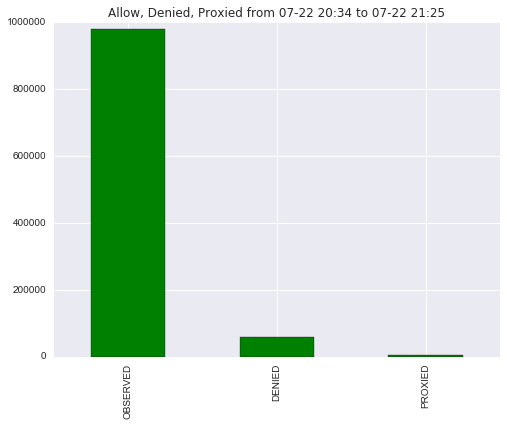

In [84]:
sgos.sc_filter_result.value_counts().plot(kind="bar", facecolor = 'green', title = 'Allow, Denied, Proxied from 07-22 20:34 to 07-22 21:25', y="Counts")

In [19]:
sgos['datetime'] = sgos.dt + ' ' + sgos.tm
sgos['datetime'] = pd.to_datetime(sgos.datetime)

In [20]:
print type(sgos.datetime[0])
sgos.datetime.head(3)

<class 'pandas.tslib.Timestamp'>


0   2011-07-22 20:34:51
1   2011-07-22 20:34:51
2   2011-07-22 20:34:51
Name: datetime, dtype: datetime64[ns]

In [63]:
import datetime
# pd.DataFrame[filtered].between_time(start_time, end_time).count()
arr = []
t0 = pd.to_datetime(sgos.datetime).iloc[0]
for i in range(0,60):
    t1 = t0 + datetime.timedelta(0,60)
    d = {}
    d['countAPPROVE'] = len(sgos[(sgos.sc_filter_result == "OBSERVED") & (sgos.datetime >= t0) & (sgos.datetime < t1)])
    d['countDENY'] = len(sgos[(sgos.sc_filter_result == "DENIED") & (sgos.datetime >= t0) & (sgos.datetime < t1)])
    d['countPROXY'] = len(sgos[(sgos.sc_filter_result == "PROXIED") & (sgos.datetime >= t0) & (sgos.datetime < t1)])
    d['total'] = d['countAPPROVE'] + d['countDENY'] + d['countPROXY']
    d['t0'] = t0
    d['t1'] = t1
    arr.append(d)
    t0 = t1

In [64]:
pd.DataFrame(arr).head(3)

,countAPPROVE,countDENY,countPROXY,t0,t1,total
0,20294,1021,41,2011-07-22 20:34:51,2011-07-22 20:35:51,21356
1,21388,1168,34,2011-07-22 20:35:51,2011-07-22 20:36:51,22590
2,18867,1102,29,2011-07-22 20:36:51,2011-07-22 20:37:51,19998


In [69]:
cols = ['countAPPROVE', 'countDENY', 'countPROXY', 'total', 't0','t1']
df = pd.DataFrame(arr, columns=cols)

### How do denials and approvals change over time?

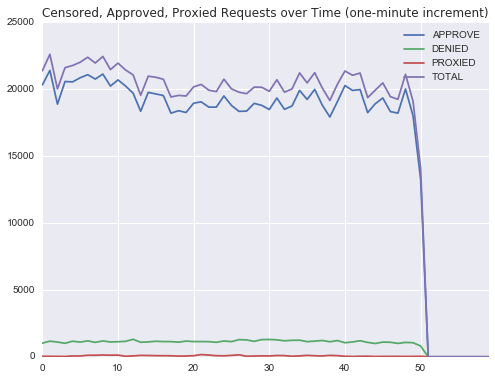

In [86]:
import matplotlib.pyplot as plt
import numpy as np

df.countAPPROVE.plot()
df.countDENY.plot()
df.countPROXY.plot()
df.total.plot()
plt.legend(['APPROVE', 'DENIED', 'PROXIED','TOTAL'], loc='upper right')
plt.title('Censored, Approved, Proxied Requests over Time (one-minute increment)')

In [99]:
sgos[sgos.sc_filter_result == 'DENIED'].groupby('cs_uri_port').count()

,dt,tm,time_taken,c_ip,cs_username,cs_auth_group,x_exception_id,sc_filter_result,cs_categories,csReferer,sc_status,s_action,cs_method,rsContentType,cs_uri_scheme,cs_host,cs_uri_path,cs_uri_query,cs_uri_extension,csUserAgent,s_ip,sc_bytes,cs_bytes,x_virus_id,datetime
cs_uri_port,,,,,,,,,,,,,,,,,,,,,,,,,
0,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643,47643
80,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301,10301
443,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
8080,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
9999,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [110]:
sgos[sgos.sc_filter_result == 'DENIED'].groupby(sgos.cs_uri_port).dt.count()

cs_uri_port
0       47643
80      10301
443        55
8080        2
9999        3
Name: dt, dtype: int64

### What ports and protocols are typically associated with denials?

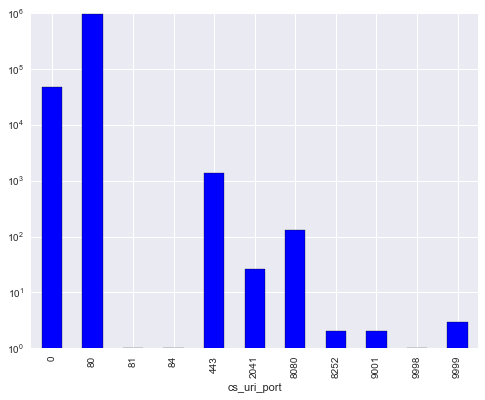

In [111]:
sgos.groupby('cs_uri_port').dt.count().plot(kind='bar', logy = True, title = "Ports for All Traffic")

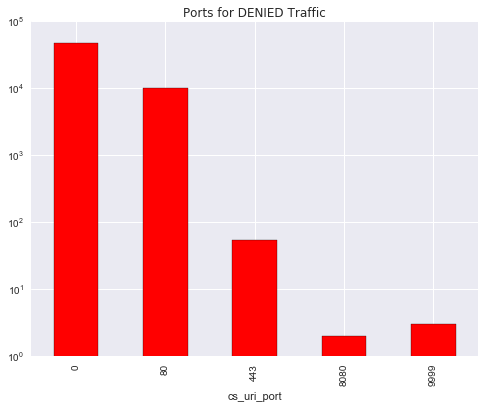

In [113]:
sgos[sgos.sc_filter_result == 'DENIED'].groupby('cs_uri_port').dt.count().plot(kind='bar', logy = True, title = "Ports for DENIED Traffic", color='red')

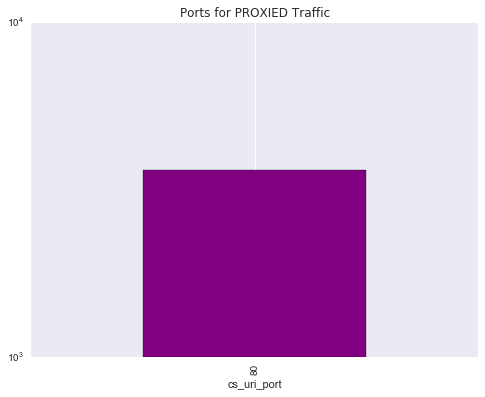

In [114]:
sgos[sgos.sc_filter_result == 'PROXIED'].groupby('cs_uri_port').dt.count().plot(kind='bar', logy = True, title = "Ports for PROXIED Traffic", color='purple')

In [141]:
denied_host_counts = sgos[sgos.sc_filter_result == 'DENIED'].groupby('cs_host').cs_host.count()

In [147]:
denied_host_counts.sort_values(inplace=True, ascending=False)

In [154]:
denied_host_counts[0:20]

cs_host
-                        47643
www.livemercial.com       1485
secsrv.gdata.de           1053
xhamster.com               658
m.facebook.com             506
www.facebook.com           367
api.facebook.com           352
sy-ads.crabdance.com       285
setup.ivelog.com           250
vkontaktereger.ru          222
g.ceipmsn.com              197
user.lucidmedia.com        173
ping.chartbeat.net         169
apps.facebook.com          168
pixel.facebook.com         135
w-66.cn                    105
proxy.yospb.yahoo.com      101
www.thehulltruth.com        99
iphone.facebook.com         89
ads.fring.com               86
Name: cs_host, dtype: int64

### Top 20 sites denied, top 20 approved

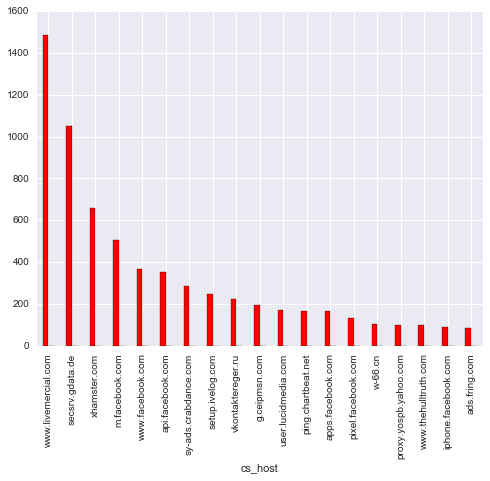

In [166]:
#import seaborn as sns
deny_counts = pd.DataFrame(denied_host_counts[1:20], columns=['cs_host', 'c'])
deny_counts.plot(kind='bar', color='red', legend=False)

In [146]:
approved_host_counts = sgos[sgos.sc_filter_result == 'OBSERVED'].groupby('cs_host').cs_host.count()
approved_host_counts.sort_values(inplace=True, ascending=False)

In [148]:
approved_host_counts[0:20]

cs_host
88.208.24.131                   46095
88.208.24.132                   45616
static.xhamster.com             29225
porn322.xvideos.com             28623
ib.adnxs.com                    25457
media2.lsops.net                17065
adserving.cpxinteractive.com    13409
static.4shared.com              12492
fxfeeds.mozilla.com              9850
bid.openx.net                    9783
dc413.4shared.com                8186
forum.kooora.com                 7683
iphone.iloveim.com               7670
www.postget.net                  6927
medleyads.com                    6875
img100.xvideos.com               6683
go.microsoft.com                 6110
cdn.content.sweetim.com          6065
v-ec.slutload-media.com          6065
api.facebook.com                 6024
Name: cs_host, dtype: int64

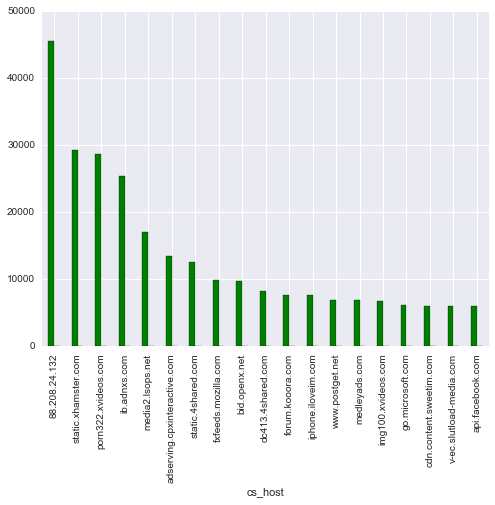

In [167]:
approve_counts = pd.DataFrame(approved_host_counts[1:20], columns=['cs_host', 'c'])
approve_counts.plot(kind='bar', color='green', legend=False)